In [1]:
# NOTE THAT THERE IS AN ISSUE WITH THE DATA THAT I PULLED TO THE SCATTER PLOTS. SEE README IN FOLDER BEFORE USE OR EVALUATION.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('merged_final.csv', low_memory=False)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 10)

In [3]:
df.head(100)

,Unnamed: 0,unitid,wmearn_unitid,geo_fips,instnm.x,stabbr.x,geo_stabbr,linkedin_flagd,pginmsa,pginstate,pginstate_adj,hhi,distance_w,avgmktwage,inst_obereg,inst_iclevel,inst_control,inst_hbcu,inst_locale,inst_ccbasic,inst_opeid,inst_flagship,fteug10to18,degtotcount,deg1count,deg2count,deg3count,deg4count,deg5count,deg6count,pfinstate,avginstate,avgtotfrosh,barrons,ugds_totam,ugds_white_avg,ugds_black_avg,ugds_hisp_avg,ugds_asian_avg,ugds_women_avg,pctfloan_avg,pctpell_avg,ug25abv_avg,inexpfte_avg,npt4_avg,total_grads_1,total_grads_5,total_grads_10,total_instate_1,total_instate_5,total_instate_10,ug_grads_1,ug_grads_5,ug_grads_10,ug_instate_1,ug_instate_5,ug_instate_10,gr_grads_1,gr_grads_5,gr_grads_10,gr_instate_1,gr_instate_5,gr_instate_10,dfrcgid,dfrcuscg,inst_city,inst_zip,inst_fips,inst_cbsa,inst_cbsatype,inst_countycd,inst_longitud,inst_latitude,ownnear_CBSACode,ownnear_CBSATitle,ownnear_geo_licode,ownnear_geo_text,ownnear_metro,ownnear_distance,alum_uscount,alum_uscovered,geo_count_state,share_state,share_state_renorm,geo_count_state_adj,share_state_adj,share_state_renorm_adj,st,staabr,region,medianhi2020,medianhi2015,medianhi2010,X10yrgrowthrate,realincomepercapita2010,realincomepercapita2015,realincomepercapita2020,X10yrgrowthrateinc,hdi,vcrimeper100000,sevcrime,wmearn2020,earn_by_unitid,wminc2020,year,instnm.y,city,stabbr.y,fips,sector,iclevel,control,hloffer,ugoffer,groffer,deggrant,hbcu,carnegie,ccbasic,c15basic,research_tot,endowment_beg,endowment_end,em_tenurefac_tot,em_nontenfac_tot,em_otherfac_tot,em_nonfaculty_tot,em_allemploy_tot,em_gradasst_tot,em_allfaculty_tot,applcnm,applcnw,admssnm,admssnw,satvr25,satvr75,satmt25,satmt75,enrlft,admssn,applcn,enrlm,enrlw,enrlt,tot_bach_comp,tot_mast_comp,tot_doct_comp,gr_rate_all,gr_rate_unkw,gr_rate_hisp,gr_rate_whit,gr_rate_asia,gr_rate_nati,gr_rate_blac,gr_rate_nres,gr_rate_wom,gr_rate_men,tuition2,fee2,tuition3,fee3,tuition6,fee6,tuition7,fee7,anyaidn,anyaidp,fgrnt_p,fgrnt_a,sgrnt_p,sgrnt_a,igrnt_p,igrnt_a,loan_p,loan_a,agrnt_p,agrnt_a,pgrnt_p,pgrnt_a,ofgrt_p,ofgrt_a,floan_p,floan_a,oloan_p,oloan_a,undergrad_tot,TexERU,hdi_unitid,sevcrime_unitid,wminc2020st_unitid
0,1,100654,46951.675680,12.0,Alabama A & M University,AL,FL,1,38.629493,54.937857,47.505300,2648.375937,210.082201,23.172288,5,1,1,1,12,18,100200,0,4149.111111,7885.0,51.0,0.0,5201.0,2526.0,0.0,107.0,60.467222,667.8,1104.4,5.0,35168,0.027063,0.937101,0.006005,0.001746,0.535751,0.789040,0.700314,0.100362,7247.0,12685.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122,1,Normal,35762,1,26620,1,1089,-86.568504,34.783367,26620,"Huntsville, AL",7,"Huntsville, Alabama Area",1,NaN,5954,4769,0,0.000000,0.000000,0.000000,0.000000,0.000000,Florida,FL,South,57763.0,48825.0,44066.0,0.310829,40345.0,43693.0,51344.0,0.214222,0.909,378.4,164.33570,0.000000,NaN,0.000000,2015,Alabama A & M University,Normal,AL,1,1,1,1,9,1,1,1,1,16,18,18,8695373.0,NaN,NaN,111.0,53.0,201.0,598.0,963.0,203.0,365.0,3030.0,4871.0,1999.0,3167.0,383.0,470.0,360.0,480.0,1451.0,5166.0,7901.0,654.0,807.0,1461.0,426.0,202.0,6.0,0.308061,0.000000,0.000000,0.375000,0.000,0.333333,0.309145,NaN,0.396648,0.213861,7770.0,1596.0,15540.0,1596.0,7074.0,1596.0,14148.0,1596.0,1166.0,97.0,76.0,5119.0,1.0,1550.0,70.0,5504.0,82.0,7431.0,94.0,8245.0,76.0,5010.0,4.0,2017.0,81.0,7391.0,2.0,6027.0,4210,0,0.890420,213.067857,18846.123530
1,2,100654,46951.675680,25.0,Alabama A & M University,AL,MA,1,38.629493,54.937857,47.505300,2648.375937,210.082201,23.172288,5,1,1,1,12,18,100200,0,4149.111111,7885.0,51.0,0.0,5201.0,2526.0,0.0,107.0,60.467222,667.8,1104.4,5.0,35168,0.027063,0.937101,0.006005,0.001746,0.535751,0.789040,0.700314,0.100362,7247.0,12685.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122,1,Normal,35762,1,26620,1,1089,-86.568504,34.783367,26620,"Huntsville, AL",7,"Huntsville, Alabama Area",1,NaN,5954,4769,0,0.000000,0.000000,0.000000,0.000000,0.000000,Massachusetts,MA,Northeast,87812.0,67861.0,60934.0,0.4

In [4]:
# Drop NaN
df_drop_nan = df.dropna(subset=['unitid', 'realincomepercapita2010', 'realincomepercapita2020', 'inst_hbcu'])

# Select columns
df_selected = df_drop_nan[['unitid', 'realincomepercapita2010', 'realincomepercapita2020', 'inst_hbcu']]

# Group by unitid, take first value from each <--------This was the problematic line for my graph. I figured that out about 30 seconds before presenting.
df_cleaned = df_selected.groupby('unitid').first().reset_index()

df_cleaned

,unitid,realincomepercapita2010,realincomepercapita2020,inst_hbcu
0,100654,40345.0,51344.0,1
1,100663,42641.0,50413.0,2
2,100690,38365.0,46738.0,2
3,100706,46397.0,56057.0,2
4,100724,41614.0,50822.0,1
...,...,...,...,...
1592,436836,49254.0,58675.0,2
1593,437316,43379.0,57175.0,2
1594,439613,58609.0,72798.0,2
1595,440411,40158.0,51226.0,2


In [5]:
print(df_cleaned.isna().sum())

unitid                     0
realincomepercapita2010    0
realincomepercapita2020    0
inst_hbcu                  0
dtype: int64


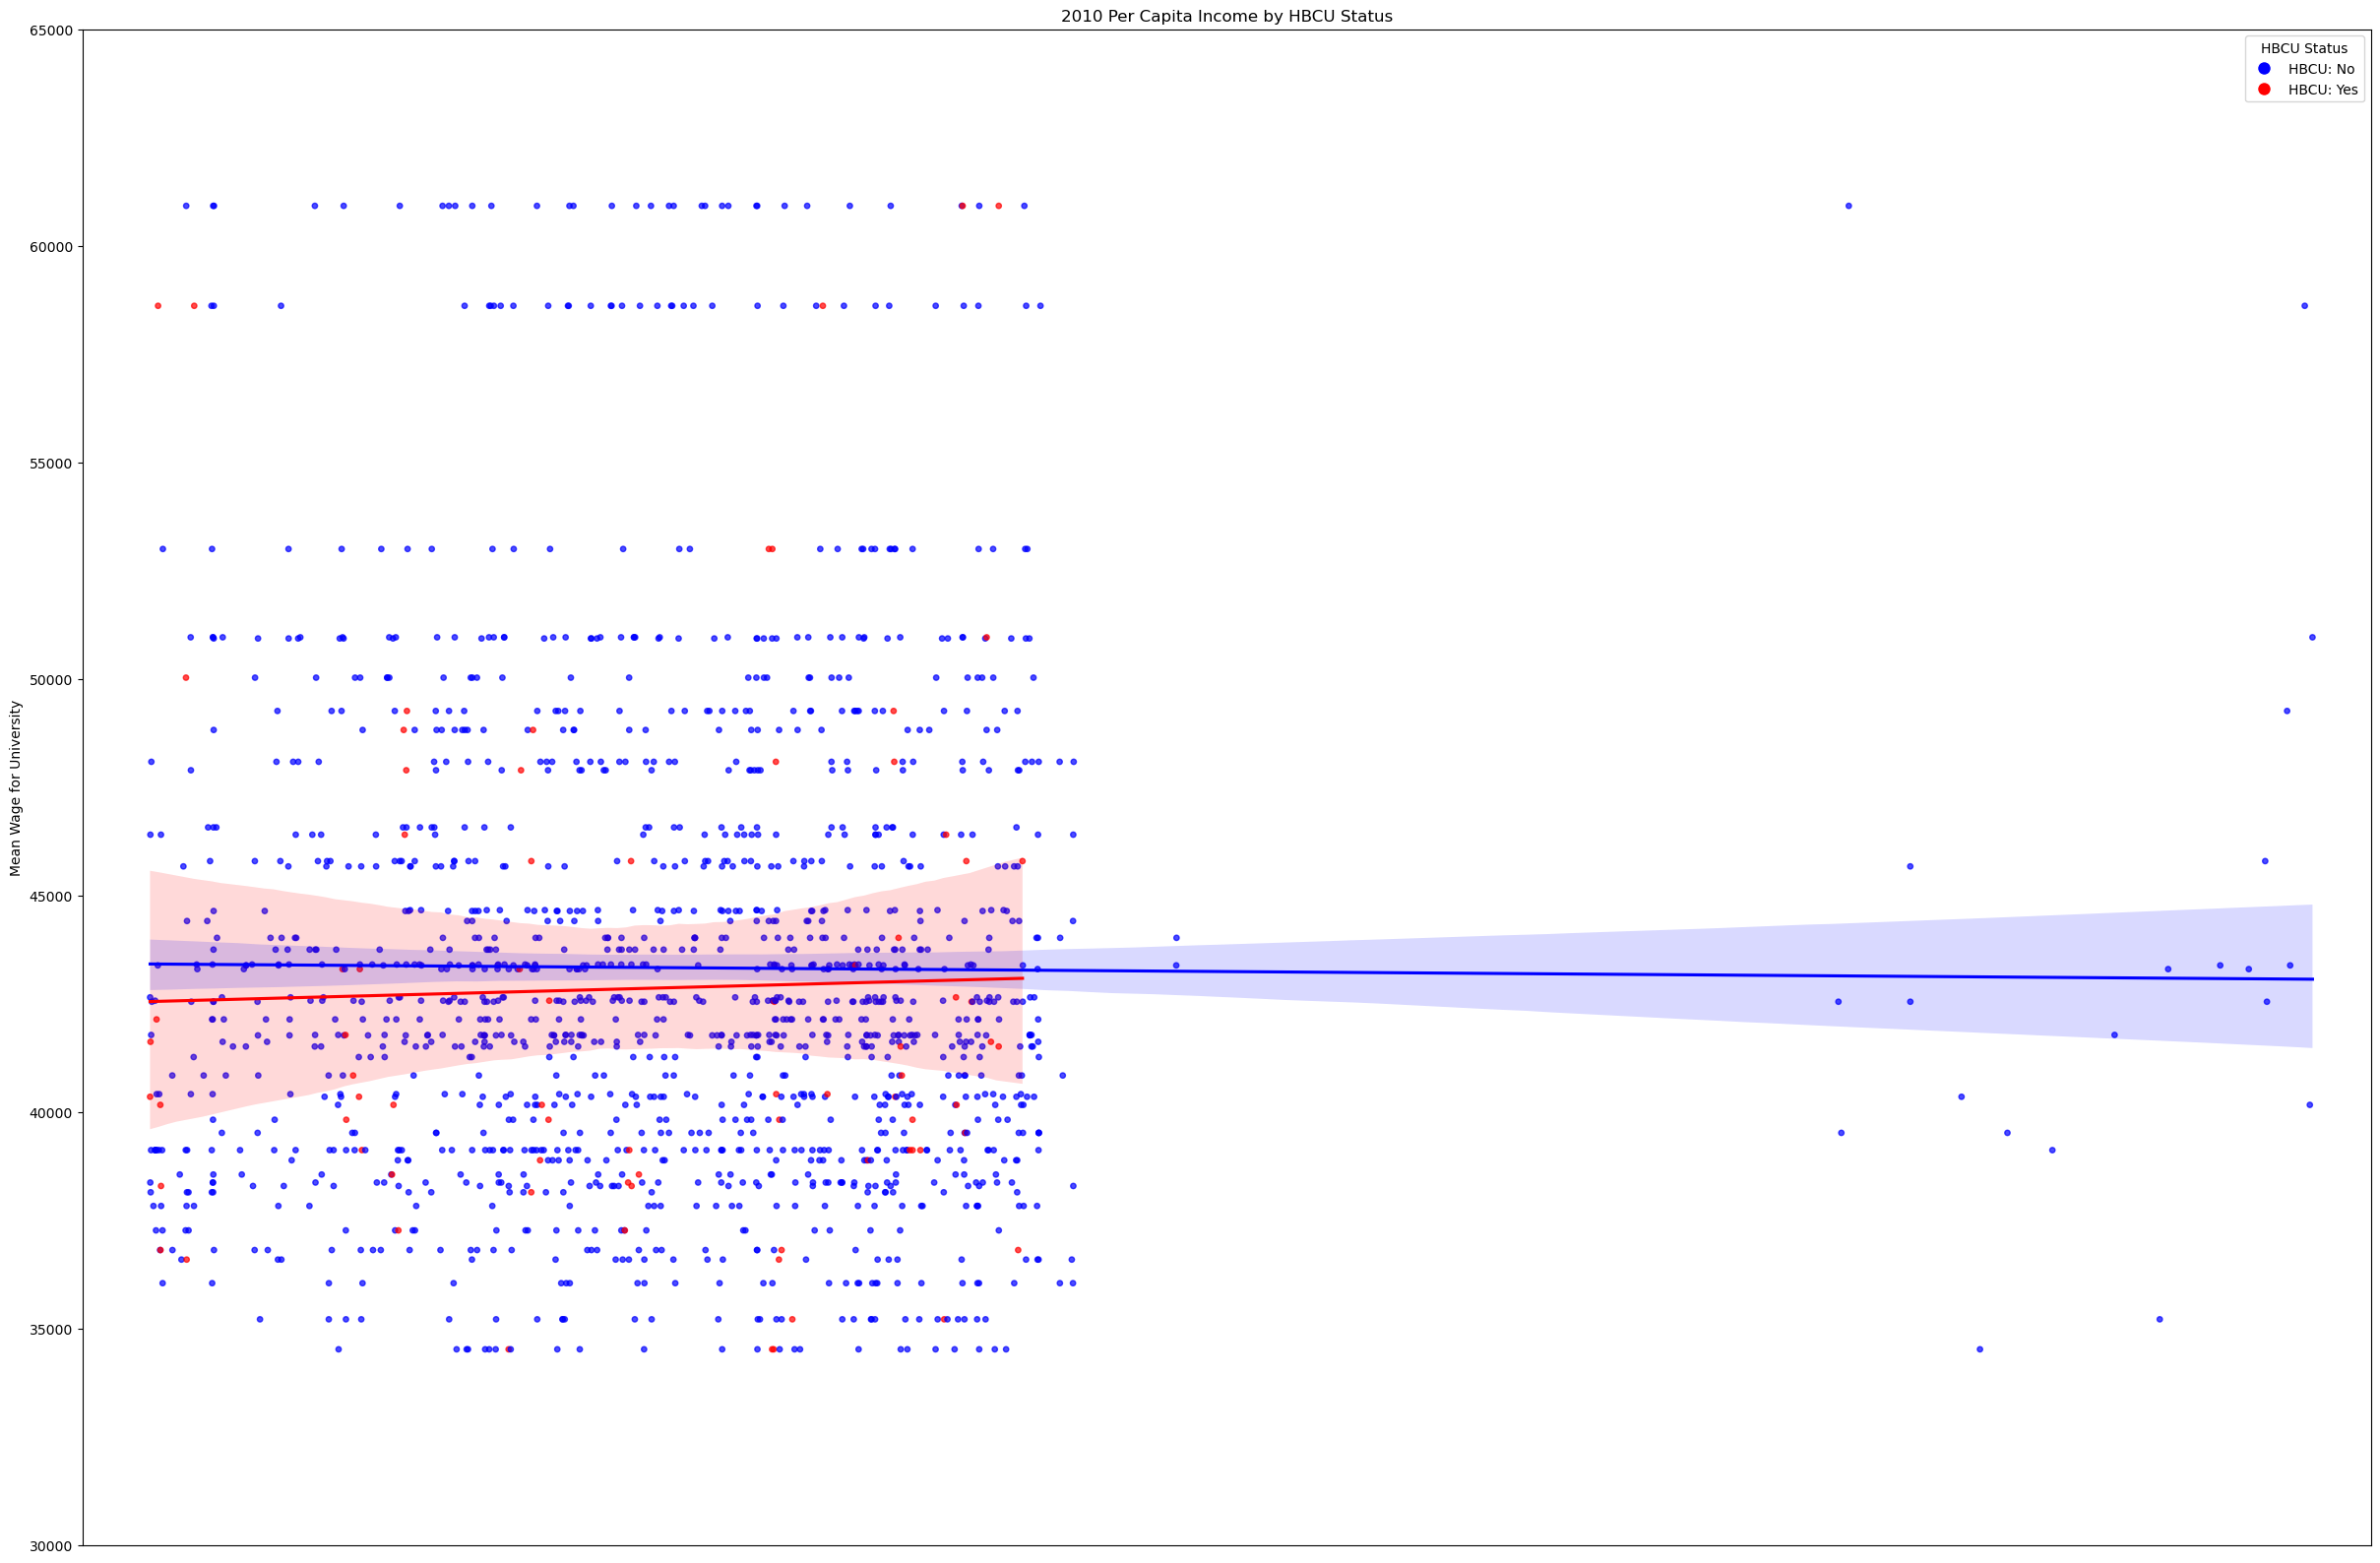

In [6]:

# Color 1 or 2 as red or blue
color_mapping = {1: 'red', 2: 'blue'}
df_cleaned['color'] = df_cleaned['inst_hbcu'].map(color_mapping)

# Figure and axis for the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Scatter plot
scatter = ax.scatter(
    x=df_cleaned['unitid'],
    y=df_cleaned['realincomepercapita2010'],
    c=df_cleaned['color'],  # Color based on 'color' column derived from 'inst_hbcu'
    alpha=0.7,
    s=15
)

df_hbcu = df_cleaned[df_cleaned['inst_hbcu'] == 1]
df_non_hbcu = df_cleaned[df_cleaned['inst_hbcu'] == 2]

# inear regression for HBCUs
sns.regplot(x='unitid', y='realincomepercapita2010', data=df_hbcu, ax=ax, scatter=False, color='red', label='HBCU')

# Linear Regression for non-HBCUs
sns.regplot(x='unitid', y='realincomepercapita2010', data=df_non_hbcu, ax=ax, scatter=False, color='blue', label='Non-HBCU')

# Axis labels
ax.set_xlabel('UNITID')
ax.set_ylabel('Mean Wage for University')

# Hiding x-axis <--------X Axis was just the university ID, so it has no data value, but it allows the chart to exist
ax.xaxis.set_visible(False)

# X and Y limits
ax.set_xlim(90000, 450000)  # Set the upper part of the range
ax.set_ylim(30000, 65000)

ax.set_title('2010 Per Capita Income by HBCU Status')

# Lables for legend
legend_labels = ['HBCU: No', 'HBCU: Yes']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)]

# legend display
ax.legend(legend_handles, legend_labels, title='HBCU Status')

# llot display
plt.show()


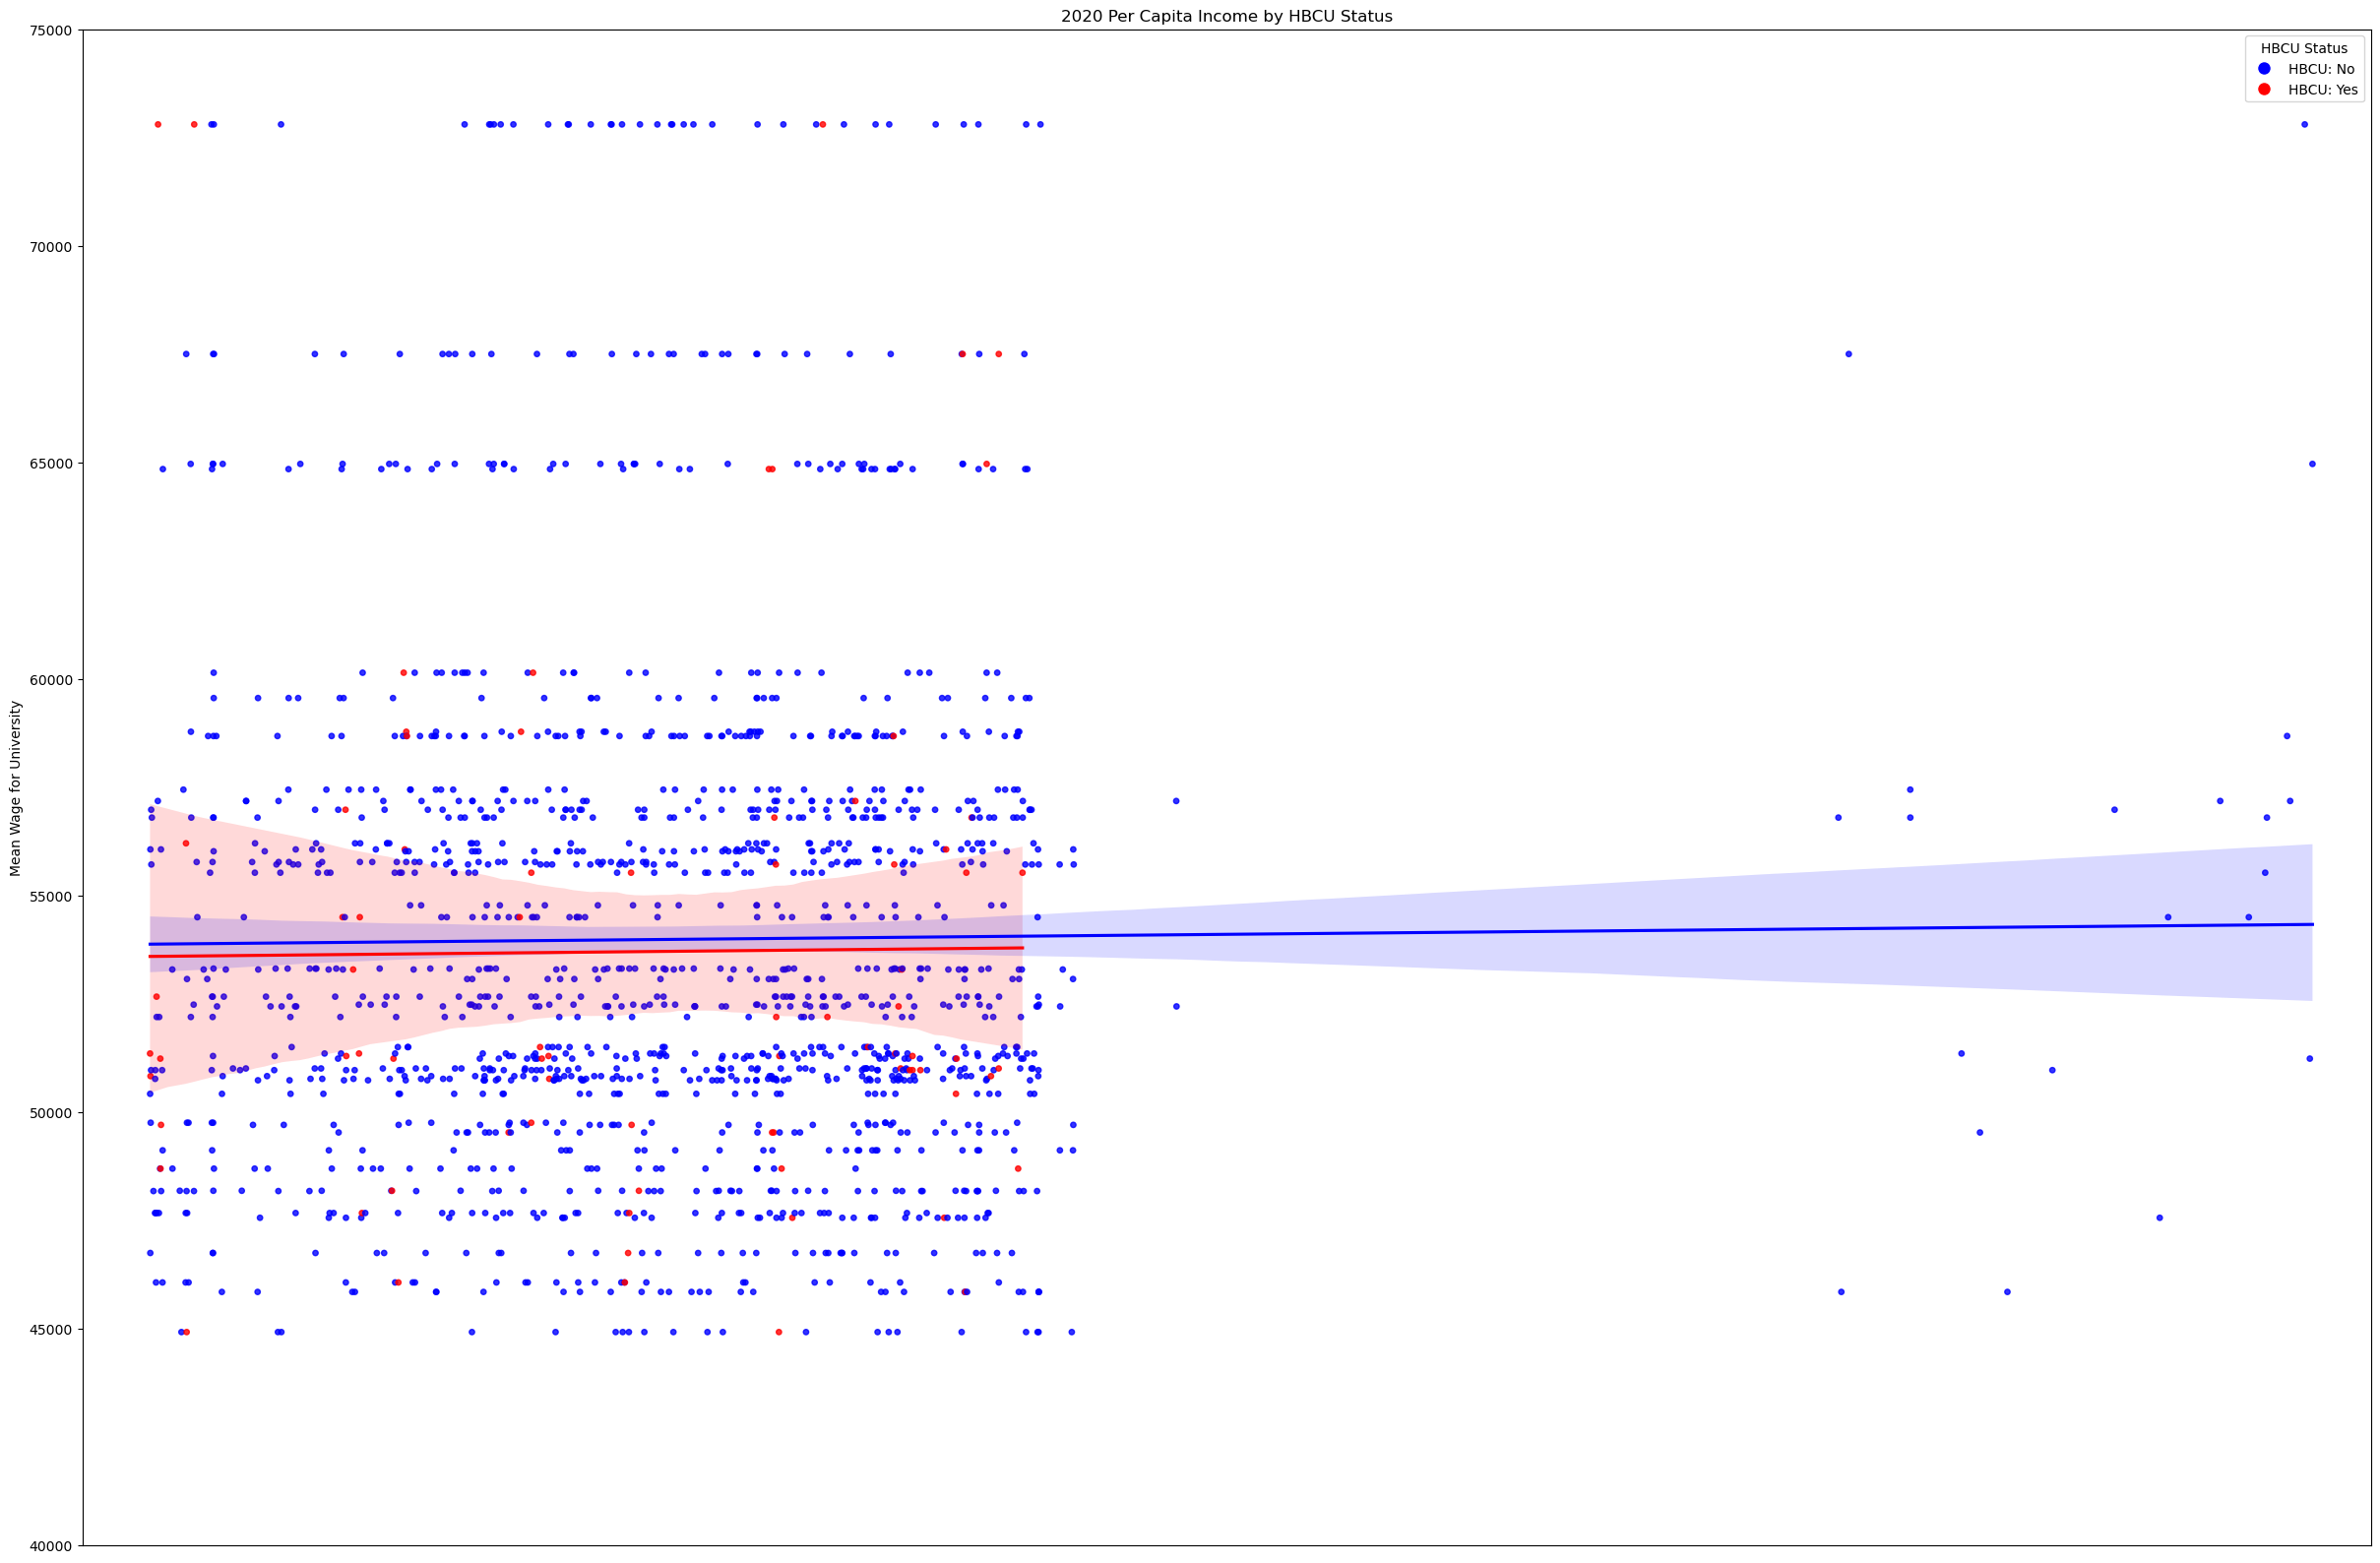

In [7]:


# SEE NOTES FROM ABOVE. SAME CODE DIFFERENT VARIABLES
color_mapping = {1: 'red', 2: 'blue'}
df_cleaned['color'] = df_cleaned['inst_hbcu'].map(color_mapping)



fig, ax = plt.subplots(figsize=(30, 20))



# Create a scatter plot
scatter = ax.scatter(
    x=df_cleaned['unitid'],
    y=df_cleaned['realincomepercapita2020'],
    c=df_cleaned['color'],  # Color based on 'color' column derived from 'inst_hbcu'
    alpha=0.8,
    s=15
)



# Filtering
df_hbcu = df_cleaned[df_cleaned['inst_hbcu'] == 1]
df_non_hbcu = df_cleaned[df_cleaned['inst_hbcu'] == 2]

# Linear regression
sns.regplot(x='unitid', y='realincomepercapita2020', data=df_hbcu, ax=ax, scatter=False, color='red', label='HBCU')


sns.regplot(x='unitid', y='realincomepercapita2020', data=df_non_hbcu, ax=ax, scatter=False, color='blue', label='Non-HBCU')

# Axis
ax.set_xlabel('UNITID')
ax.set_ylabel('Mean Wage for University')



ax.xaxis.set_visible(False)



ax.set_xlim(90000, 450000)  # Set the upper part of the range
ax.set_ylim(40000, 75000)


ax.set_title('2020 Per Capita Income by HBCU Status')


# Legend
legend_labels = ['HBCU: No', 'HBCU: Yes']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)]


ax.legend(legend_handles, legend_labels, title='HBCU Status')

# Display
plt.show()


In [8]:
# This was not presented, but calculated means and medians for 2010
red_mean = df_cleaned[df_cleaned['color'] == 'red']['realincomepercapita2010'].mean()
blue_mean = df_cleaned[df_cleaned['color'] == 'blue']['realincomepercapita2010'].mean()
red_median = df_cleaned[df_cleaned['color'] == 'red']['realincomepercapita2010'].median()
blue_median = df_cleaned[df_cleaned['color'] == 'blue']['realincomepercapita2010'].median()

# Calculated differences in low and high values
red_max = df_cleaned[df_cleaned['color'] == 'red']['realincomepercapita2010'].max()
red_min = df_cleaned[df_cleaned['color'] == 'red']['realincomepercapita2010'].min()
blue_max = df_cleaned[df_cleaned['color'] == 'blue']['realincomepercapita2010'].max()
blue_min = df_cleaned[df_cleaned['color'] == 'blue']['realincomepercapita2010'].min()

# Header for HBCU: Yes
print("HBCU:")

print("\n")

print(f"Mean: {red_mean}")
print(f"Median: {red_median}")
print(f"Highest value: {red_max}")
print(f"Lowest value: {red_min}")

# BLANK LINE PRINT
print("\n")

# Header
print("Non-HBCU:")

print("\n")

print(f"Mean: {blue_mean}")
print(f"Median: {blue_median}")
print(f"Highest value: {blue_max}")
print(f"Lowest value: {blue_min}")

print("\n")

mean_dif = blue_mean - red_mean
mean_per_dif = (mean_dif / red_mean) * 100

median_dif = blue_median - red_median
median_per_dif = (median_dif / red_median) * 100

high_dif = blue_max - red_max
high_per_dif = (high_dif / red_max) * 100

low_dif = blue_min - red_min
low_per_dif = (low_dif / red_min) * 100

print("Differences between HBCU and Non-HBCU Earnings:")

print("\n")

print(f"Numerical difference in Averages: {mean_dif:.2f}")
print(f"Percentage difference relative to Non-HBCU Earnings: {mean_per_dif:.2f}%")

print("\n")

print(f"Numerical difference in Medians: {median_dif:.2f}")
print(f"Percentage difference relative to Non-HBCU Earnings: {median_per_dif:.2f}%")

print("\n")

print(f"Numerical difference in Highs: {high_dif:.2f}")
print(f"Percentage difference relative to Non-HBCU Earnings: {high_per_dif:.2f}%")

print("\n")

print(f"Numerical difference in Lows: {low_dif:.2f}")
print(f"Percentage difference relative to Non-HBCU Earnings: {low_per_dif:.2f}%")

HBCU:


Mean: 42845.962025316454
Median: 40837.0
Highest value: 60917.0
Lowest value: 34514.0


Non-HBCU:


Mean: 43325.75230566535
Median: 42540.0
Highest value: 60917.0
Lowest value: 34514.0


Differences between HBCU and Non-HBCU Earnings:


Numerical difference in Averages: 479.79
Percentage difference relative to Non-HBCU Earnings: 1.12%


Numerical difference in Medians: 1703.00
Percentage difference relative to Non-HBCU Earnings: 4.17%


Numerical difference in Highs: 0.00
Percentage difference relative to Non-HBCU Earnings: 0.00%


Numerical difference in Lows: 0.00
Percentage difference relative to Non-HBCU Earnings: 0.00%
